In [4]:
from keras import datasets

(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

In [23]:
word_index = datasets.reuters.get_word_index()
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [25]:
decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [27]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    r = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        r[i, sequence] = 1.
    return r

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [61]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [62]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])

In [63]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [64]:
history = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 100us/step - loss: 2.6076 - acc: 0.5023 - val_loss: 1.7523 - val_acc: 0.6500
Epoch 2/7
7982/7982 [==============================] - 1s 88us/step - loss: 1.4155 - acc: 0.7106 - val_loss: 1.3322 - val_acc: 0.6990
Epoch 3/7
7982/7982 [==============================] - 1s 88us/step - loss: 1.0480 - acc: 0.7770 - val_loss: 1.1339 - val_acc: 0.7560
Epoch 4/7
7982/7982 [==============================] - 1s 88us/step - loss: 0.8266 - acc: 0.8232 - val_loss: 1.0310 - val_acc: 0.7770
Epoch 5/7
7982/7982 [==============================] - 1s 89us/step - loss: 0.6611 - acc: 0.8573 - val_loss: 1.0024 - val_acc: 0.7890
Epoch 6/7
7982/7982 [==============================] - 1s 88us/step - loss: 0.5274 - acc: 0.8906 - val_loss: 0.9197 - val_acc: 0.8150
Epoch 7/7
7982/7982 [==============================] - 1s 88us/step - loss: 0.4232 - acc: 0.9112 - val_loss: 0.9027 - val_acc: 0.8120


In [37]:
history = history.history

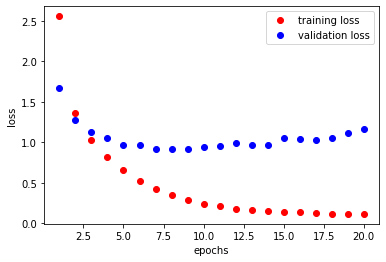

In [48]:
import matplotlib.pyplot as plt

loss = history["loss"]
val_loss = history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='training loss')
plt.plot(epochs, val_loss, 'bo', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

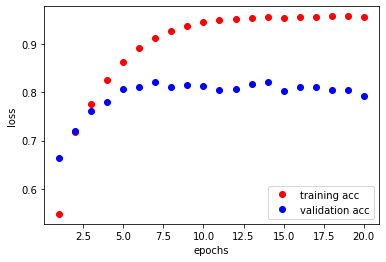

In [49]:
acc = history["acc"]
val_acc = history["val_acc"]

plt.plot(epochs, acc, 'ro', label='training acc')
plt.plot(epochs, val_acc, 'bo', label='validation acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [69]:
r = model.evaluate(x_test, one_hot_test_labels)
r

2246/2246 [==============================] - 0s 116us/step


[0.9903419274680867, 0.7858415246009827]

In [70]:
predictions = model.predict(x_test)

In [80]:
np.sum(predictions[0])

1.0000001

In [81]:
np.argmax(predictions[0])

3

In [85]:
np.argmax(one_hot_test_labels[0]) # good!!

3